# Matplotlib

This tutorial will introduce you to using matplotlib, a very useful python library for plotting graphs and displaying images.

We will cover plotting the following types of graph, looking at both 2D and 3D output:
* Line graphs
* Histograms
* 3D heightfields
* 3D curves

First, we need to import the library. To simplify the code here I'm importing it under the alias plt.

Matplotlib functions generally take numpy arrays as inputs, so we will import numpy too.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Line plots

The first type of plot we will introduce are line plots. These are produced using the `plt.plot()` function, which takes numpy arrays of x and y values.

Below we plot the graph of `sin(x)` from 0 to 2*pi.

Note that we have to call `plt.show()` after plotting to display the completed graph.

We'll use `np.linspace()` to make the x values. This is a really useful function that gives you evenly spaced values between two specified `start` and `end` numbers, and is useful when plotting graphs like this.

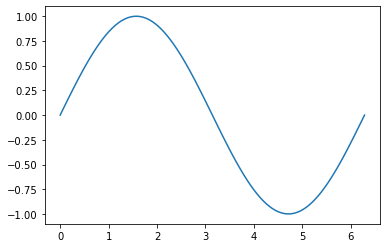

In [51]:
import math

x = np.linspace(0.0, 2.0 * math.pi, num=100) # I chose 100 points here.
# More points will give a smoother plot, but too many will be slow and consume memory.

y = np.sin(x)

plt.plot(x, y)
plt.show()

Most plotting functions in matplotlib have a lot of optional arguments which let you change aspects of the plot. In this case we can change the colour of the line, add markers to each point in the line and so on.

Below are a few examples. This also shows how you can plot multiple lines in the same graph, just by plotting each and then calling `plt.show()` at the end.

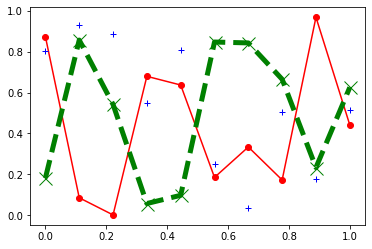

In [52]:
x = np.linspace(0.0, 1.0, num=10)

y = np.random.rand(10)
# ro- means red, with dots, joined by solid lines
plt.plot(x, y, "ro-") 

y = np.random.rand(10)
# gx-- means green, with crosses, joined by dashed lines. 
# linewidth and markersize increase the width of the line and the size of the crosses.
plt.plot(x, y, "gx--", linewidth=5, markersize=13) 


y = np.random.rand(10)
# b+ means blue, with plus signs, and no lines (a scatter plot). 
plt.plot(x, y, "b+") 
plt.show()

# Histograms

Histograms are a useful way to interpret statistical data, and are easy to plot using the `plt.hist()` function in matplotlib.

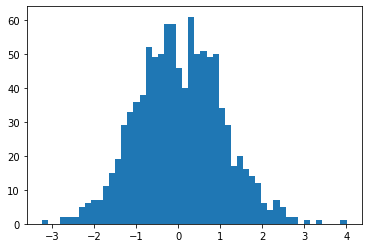

In [53]:
data = np.random.normal(size=1000) # Draw 1000 samples from a normal distribution, with mean 0 and stdev 1
plt.hist(data, bins=50) # Plot a histogram with 50 bins. By default bins are evenly spaced between the min and max values in the input.
plt.show()

The above histogram has the bin edges set automatically, evenly spaced between the maximum and minum values in the input.

If you want more control over the histogram, you can manually set the range of the bins:

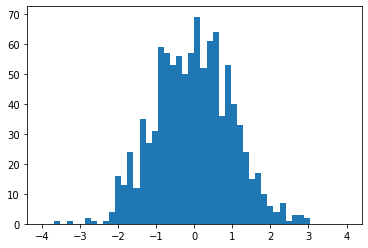

In [54]:
data = np.random.normal(size=1000) 
plt.hist(data, bins=50, range=(-4,4)) # This forces the bins to be evenly spaced between -4 and 4.
plt.show()

It's also possible to manually set the edges of the bins, to get bins of uneven width:

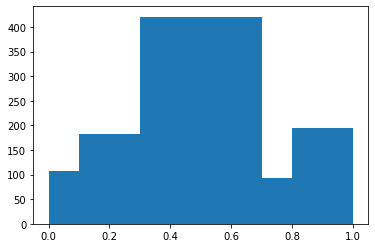

In [55]:
data = np.random.rand(1000) # Draw 1000 samples from a uniform random distribution in [0,1)
plt.hist(data, bins=[0, 0.1, 0.3, 0.7, 0.8, 1.0]) # Manually set the edges of the histogram bins
plt.show()

# 3D Plots

It's also possible to plot results in 3D graphs which you can then rotate as desired.

*Note* Unfortunately in some Jupyter notebook displayers you can't rotate the plot. However by running the same code in a python terminal you'll get an interactive 3D plot you can rotate as desired.

First we'll plot a heightfield (2D surface). For this we supply 3 2D arrays as input. These contain the x value, y value and height at each point in the heightmap.

To generate the x and y values, we'll use a trick which we first introduce below:

In [56]:
x = np.linspace(0, 1, num=5) # This makes a vector of length 5 as usual
print("Initial shape of x:", x.shape)

x = x[None,:] # This adds a dimension to the start of x of length 1. This means it's now a 1x5 array.
print("Shape of x after adding empty dimension", x.shape)

x = np.repeat(x, 5, axis=0) # We now repeat x 5 times along axis 0. This gives a 5x5 result.
print("Final shape of x after repeat():", x.shape)

#Now x contains the x coordinates as desired:
print(x)

Initial shape of x: (5,)
Shape of x after adding empty dimension (1, 5)
Final shape of x after repeat(): (5, 5)
[[0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]]


Now we know how to make the x coordinates, we can make the y coordinates in the same way. It's then straightforward to make the height values and plot the graph.

Plotting in this case works a bit differently - you first make a 3D axes object using `ax = plt.axes(projection="3d")`. You can then plot the actual surface using `ax.plot_surface()`.

Here we plot the 2D sinc function `sin(r)/r`, where `r` is the radius `sqrt(x*x + y*y)`.

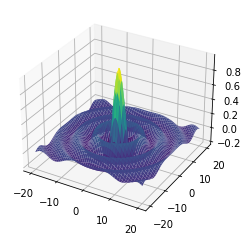

In [57]:
plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-20, 20, num=100)
x = x[None,:]
x = np.repeat(x, 100, axis=0)

y = np.linspace(-20, 20, num=100)
y = y[:,None]
y = np.repeat(y, 100, axis=1)

radius = np.sqrt(x*x + y*y)
height = np.sin(radius) / radius

ax.plot_surface(x, y, height, cmap='viridis', edgecolor='none')
plt.show()

As it happens, numpy has a convenience function `np.meshgrid()` which can be used to generate x and y arrays like we did above. Below is an example using meshgrid - note that it produces the same output graph.

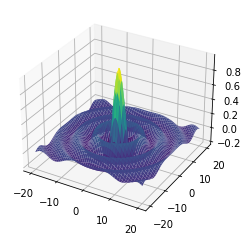

In [3]:
plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-20, 20, num=100)
y = np.linspace(-20, 20, num=100)

x, y = np.meshgrid(x, y)

radius = np.sqrt(x*x + y*y)
height = np.sin(radius) / radius

ax.plot_surface(x, y, height, cmap='viridis', edgecolor='none')
plt.show()

It's also possible to plot lines in 3D space. To do this we supply 3 vectors, which contain the x, y and z coordinates of each point in the line.

We create a 3D axes object, and then use `axes.plot(x, y, z)`. This works very similarly to `plt.plot(x,y)`, just taking an extra argument for the z coordinates.

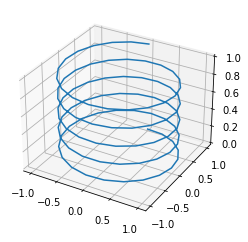

In [61]:
plt.figure()
ax = plt.axes(projection='3d')

# Make a spiral with 5 complete revolutions, of height 1
n_revolutions = 5
height = 1
theta = np.linspace(0, n_revolutions*2*math.pi, num=100)
x = np.sin(theta)
y = np.cos(theta)
z = np.linspace(0, height, num=100)

ax.plot(x, y, z)
plt.show()

## Exercise: Draw More Plots!

I'd encourage you to try out some more of the plot types in Matplotlib. Start from the documentation for a particular plot, work through the example provided and learn how to format your numpy array data to show an interesting function.

Here are some suggestions to try:
* Try some more of the basic plots [here](https://matplotlib.org/stable/plot_types/basic/index.html)
* Multi-dimensional plots:
    * The [contour](https://matplotlib.org/stable/plot_types/arrays/contour.html) and [contourf](https://matplotlib.org/stable/plot_types/arrays/contourf.html) plots are alternative ways of showing heightfields. Try using them to plot the sinc function above.
    * The [quiver](https://matplotlib.org/stable/plot_types/arrays/quiver.html) plot can be used to show vector fields. Try using it to plot some gravitational fields in 2D (use [Newton's law](https://en.wikipedia.org/wiki/Newton's_law_of_universal_gravitation)) and plot the net force for different configurations of planets (add up the gravitational force vector to each).
* Once you've completed the Randomness & Probability notebook, try plotting some [box plots](https://matplotlib.org/stable/plot_types/stats/boxplot_plot.html#sphx-glr-plot-types-stats-boxplot-plot-py) and [violin plots](https://matplotlib.org/stable/plot_types/stats/violin.html) for some normally distributed data. Then try generating data from a [skewed normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html). How do the plots change?

## Further Reading

Matplotlib is a very capable library with a huge range of plot types, and these examples just scratch the surface. I'd recommend checking out the [documentation for matplotlib, particularly the page on plot types](https://matplotlib.org/stable/plot_types/index.html) if there's a type of graph you'd like to use that wasn't covered here.